In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns

In [3]:
hitter_csv = [file for file in os.listdir('./merged_data') if 'hitters' in file]

In [4]:
li = []
for csv in hitter_csv:
    li.append(pd.read_csv('./merged_data/' + csv))
hitters = pd.concat(li, axis = 0, ignore_index = True)

In [5]:
pitcher_csv = [file for file in os.listdir('./merged_data') if 'pitchers' in file]

In [6]:
li = []
for csv in pitcher_csv:
    li.append(pd.read_csv('./merged_data/' + csv))
pitchers = pd.concat(li, axis = 0, ignore_index = True)

In [7]:
hitters.columns

Index(['Unnamed: 0', 'team code', ' game_date', ' game_number', ' mlb id',
       'Name', ' batting order', ' confirmed', ' position', 'opp_pitch_hand',
       'opp_pitch', 'bats', 'k_pct', 'bb_pct', 'bb_k', 'bat_avg', 'obp', 'slg',
       'ops', 'iso', 'babip', 'wrc', 'wraa', 'woba', 'wrc_plus', 'opp_k/9',
       'opp_bb/9', 'opp_k/bb', 'opp_hr/9', 'opp_k_pct', 'opp_bb_pct',
       'opp_k_bb_pct', 'opp_avg', 'opp_whip', 'opp_babip', 'opp_lob_pct',
       'opp_fip', 'opp_xfip', 'Date', 'GID', 'MLB_ID', 'Starter', 'Bat order',
       'DK posn', 'DK pts', 'DK sal', 'Team', 'Oppt', 'dblhdr', 'Tm Runs',
       'Opp Runs'],
      dtype='object')

In [8]:
pitchers.columns

Index(['Unnamed: 0', 'team code', ' game_date', ' game_number', ' mlb id',
       'Name', ' batting order', ' confirmed', ' position', 'num_L_bats',
       'num_R_bats', 'is_nl', 'k_9_l', 'bb_9_l', 'k_bb_l', 'hr_9_l', 'k_pct_l',
       'bb_pct_l', 'k_bb_pct_l', 'bat_avg_l', 'whip_l', 'babip_l', 'lob_pct_l',
       'fip_l', 'xfip_l', 'k_9_r', 'bb_9_r', 'k_bb_r', 'hr_9_r', 'k_pct_r',
       'bb_pct_r', 'k_bb_pct_r', 'bat_avg_r', 'whip_r', 'babip_r', 'lob_pct_r',
       'fip_r', 'xfip_r', 'k_9_l_tot', 'bb_9_l_tot', 'k_bb_l_tot',
       'hr_9_l_tot', 'k_pct_l_tot', 'bb_pct_l_tot', 'k_bb_pct_l_tot',
       'bat_avg_l_tot', 'whip_l_tot', 'babip_l_tot', 'lob_pct_l_tot',
       'fip_l_tot', 'xfip_l_tot', 'k_9_r_tot', 'bb_9_r_tot', 'k_bb_r_tot',
       'hr_9_r_tot', 'k_pct_r_tot', 'bb_pct_r_tot', 'k_bb_pct_r_tot',
       'bat_avg_r_tot', 'whip_r_tot', 'babip_r_tot', 'lob_pct_r_tot',
       'fip_r_tot', 'xfip_r_tot', 'Date', 'GID', 'MLB_ID', 'Starter',
       'Bat order', 'DK posn', 'DK pts', 'D

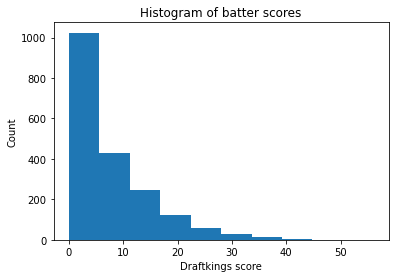

In [9]:
plt.hist(hitters['DK pts'])
plt.title('Histogram of batter scores')
plt.xlabel('Draftkings score')
plt.ylabel('Count');

**Conclusion:** This distribution is right skewed. I will look into transforming this data when it comes time to create the model.

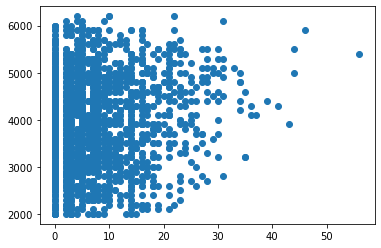

In [10]:
plt.scatter(hitters['DK pts'], hitters['DK sal'])

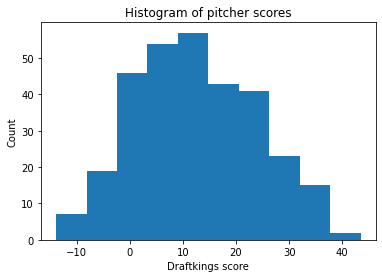

In [11]:
plt.hist(pitchers['DK pts'])
plt.title('Histogram of pitcher scores')
plt.xlabel('Draftkings score')
plt.ylabel('Count');

**Conclusion:** This distribution is close to normally distributed and will likely not need to be transformed.

In [12]:
hitters.columns

Index(['Unnamed: 0', 'team code', ' game_date', ' game_number', ' mlb id',
       'Name', ' batting order', ' confirmed', ' position', 'opp_pitch_hand',
       'opp_pitch', 'bats', 'k_pct', 'bb_pct', 'bb_k', 'bat_avg', 'obp', 'slg',
       'ops', 'iso', 'babip', 'wrc', 'wraa', 'woba', 'wrc_plus', 'opp_k/9',
       'opp_bb/9', 'opp_k/bb', 'opp_hr/9', 'opp_k_pct', 'opp_bb_pct',
       'opp_k_bb_pct', 'opp_avg', 'opp_whip', 'opp_babip', 'opp_lob_pct',
       'opp_fip', 'opp_xfip', 'Date', 'GID', 'MLB_ID', 'Starter', 'Bat order',
       'DK posn', 'DK pts', 'DK sal', 'Team', 'Oppt', 'dblhdr', 'Tm Runs',
       'Opp Runs'],
      dtype='object')

In [13]:
h_feat = ['Name', 'opp_pitch_hand', 'bats','k_pct','bb_pct','bb_k','bat_avg','obp',
         'slg','ops','iso','babip','wrc','wraa','woba','wrc_plus','DK sal', 'DK pts']
hdf = hitters[h_feat]

<AxesSubplot:>

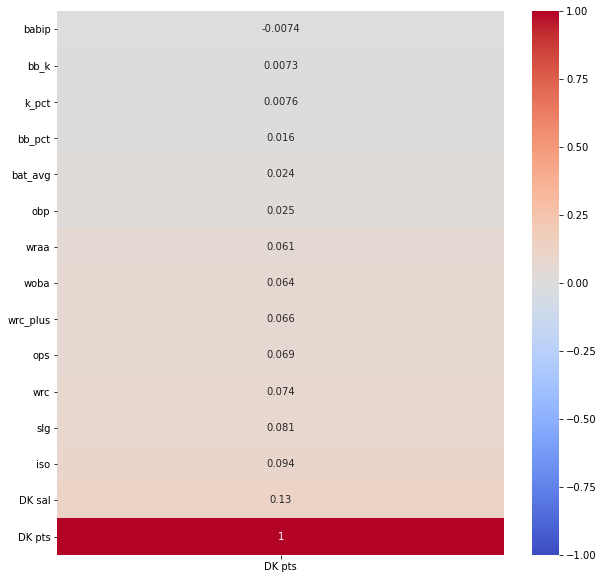

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(hdf.corr()[['DK pts']].sort_values('DK pts') , vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

**Conclusion:** There is very little correlation between any of the stats and draftkings points for batters. Much of this likely has to do with the inconsistency of batter performance game to game. This will be a problem when it comes to modeling. I will pursue finding new stats that could have more predictive value. I am also looking into other techniques than regression to predict hitter performance. If I cannot find any other strong methods, I will focus on optimizing the pitcher model and will use other methods to rank batters.

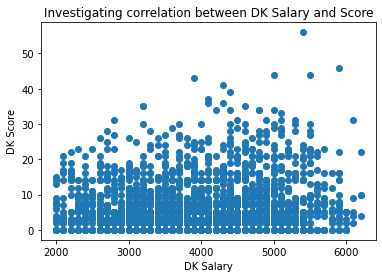

In [15]:
plt.scatter(hitters['DK sal'], hitters['DK pts'])
plt.title('Investigating correlation between DK Salary and Score')
plt.xlabel('DK Salary')
plt.ylabel('DK Score');

**Conclusion:** Draftkings salary is DraftKings prediction of player value in order to create fair games. Even this is only slightly correlated. As even draftkings has difficulty predicting score, it is very difficult to predict. The positive of seeing this is that getting any amount of strong predictive value would put me above the competition.

In [16]:
pitchers.columns

Index(['Unnamed: 0', 'team code', ' game_date', ' game_number', ' mlb id',
       'Name', ' batting order', ' confirmed', ' position', 'num_L_bats',
       'num_R_bats', 'is_nl', 'k_9_l', 'bb_9_l', 'k_bb_l', 'hr_9_l', 'k_pct_l',
       'bb_pct_l', 'k_bb_pct_l', 'bat_avg_l', 'whip_l', 'babip_l', 'lob_pct_l',
       'fip_l', 'xfip_l', 'k_9_r', 'bb_9_r', 'k_bb_r', 'hr_9_r', 'k_pct_r',
       'bb_pct_r', 'k_bb_pct_r', 'bat_avg_r', 'whip_r', 'babip_r', 'lob_pct_r',
       'fip_r', 'xfip_r', 'k_9_l_tot', 'bb_9_l_tot', 'k_bb_l_tot',
       'hr_9_l_tot', 'k_pct_l_tot', 'bb_pct_l_tot', 'k_bb_pct_l_tot',
       'bat_avg_l_tot', 'whip_l_tot', 'babip_l_tot', 'lob_pct_l_tot',
       'fip_l_tot', 'xfip_l_tot', 'k_9_r_tot', 'bb_9_r_tot', 'k_bb_r_tot',
       'hr_9_r_tot', 'k_pct_r_tot', 'bb_pct_r_tot', 'k_bb_pct_r_tot',
       'bat_avg_r_tot', 'whip_r_tot', 'babip_r_tot', 'lob_pct_r_tot',
       'fip_r_tot', 'xfip_r_tot', 'Date', 'GID', 'MLB_ID', 'Starter',
       'Bat order', 'DK posn', 'DK pts', 'D

In [25]:
p_feat = ['is_nl','k_9_l','bb_9_l','k_bb_l','hr_9_l',
         'k_pct_l','bb_pct_l','k_bb_pct_l','bat_avg_l','whip_l','babip_l','lob_pct_l',
         'fip_l','xfip_l','DK sal', 'DK pts']
pdf = pitchers[p_feat]

<AxesSubplot:>

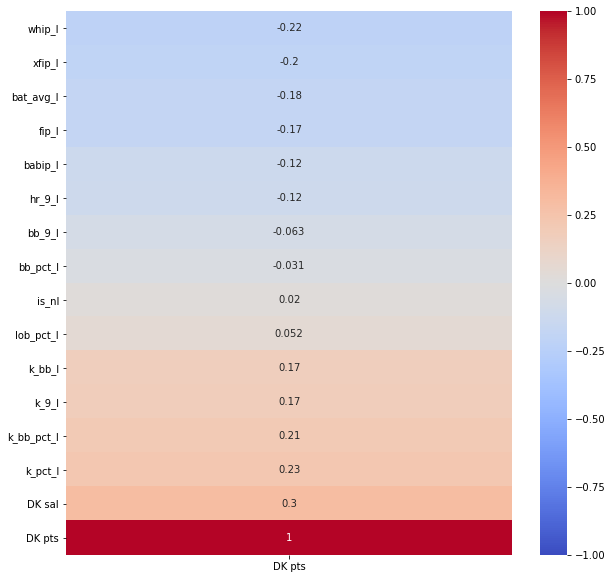

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(pdf.corr()[['DK pts']].sort_values('DK pts'), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

**Conclusions:** This heatmap doesnt have all of the features in the data, but it shows a much more positive outlook on the predictive value of stats. This makes sense because pitchers tend to have more consistent performances. There is still some correlation between the features that I will have to look out for.

In [19]:
hitters['s>0'] = hitters['DK pts'].map(lambda x: 1 if x > 0 else 0)

In [20]:
hitters.groupby('s>0').count()

,Unnamed: 0,team code,game_date,game_number,mlb id,Name,batting order,confirmed,position,opp_pitch_hand,...,Starter,Bat order,DK posn,DK pts,DK sal,Team,Oppt,dblhdr,Tm Runs,Opp Runs
s>0,,,,,,,,,,,,,,,,,,,,,
0,407,407,407,407,407,407,407,407,157,407,...,407,407,392,407,392,407,407,0,407,407
1,1521,1521,1521,1521,1521,1521,1521,1521,614,1521,...,1521,1521,1486,1521,1486,1521,1521,0,1521,1521


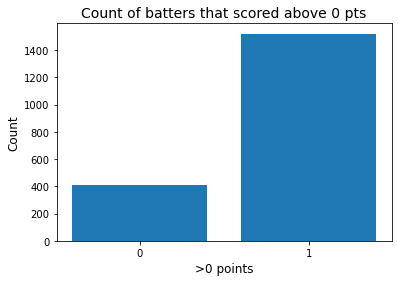

In [21]:
plt.bar(hitters.groupby('s>0').count().index, hitters.groupby('s>0').count()['DK pts'])
plt.xticks([0,1],[0,1])
plt.xlabel('>0 points', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Count of batters that scored above 0 pts', fontsize = 14);

**Conclusion:** A quarter of batters get scores of 0 on draftkings. Between the low correlation and the high number of players who score zero points, batters will be very difficult to predict.

**Next Steps:** My main priority is looking into ways to improve my ability to predict batter scores. I am going to look into finding more statistics that may be predictive. I also want to get a stronger bearing on how some of the advanced stats are calculated so I know which ones are going to be strongly correlated. For the pitcher data I am working on feature engineering to be able to account for the number of batters of each handedness in a lineup combined with how the pitcher performs against that handedness. After that I am going to prioritize modeling using a variety of regression models. I am also still interested in attempting to simulate games, but that will only be if I have time.